<h2>Letras Financeiras do Tesouro – LFT</h2>

<h3>Valor Nominal</h3>

Periodicidade de atualização : diária

Parâmetro de atualização: Taxa SELIC

Calculado pela fórmula VNA = VNb x C

<b>VNA</b> – Valor Nominal atualizado, calculado com 6 (seis) casas decimais sem arredondamento

<b>VNb</b> – Valor Nominal da data base, ou da data da última amortização ou incorporação, se houver, informado ou calculado com 6 (seis) casas decimais, sem arredondamento.


<b>C</b> – Fator resultante do produtório das taxas SELIC, referentes ao período da data base até a próxima data de atualização ou até a data de vencimento, calculado com 8 (oito) casas decimais com arredondamento, assim definido:


$$
  \prod_{k=1}^n \left(1 + TSelic_k\right),\ com\ k = 1, 2, ... n
$$

$TSelic_k$ = Taxa Selic, expressa ao dia, calculada com arredondamento na 8a (oitava) casa decimal, conforme segue:

$$
    TSelic_k = \left(\frac{Selic_k}{100}+1\right)^{\frac{1}{252}} - 1,\ com\ k = 1, 2, ... n
$$

$Selic_k$ – Taxa Selic,divulgada pelo Banco Central do Brasil, informada com 2 (duas) casas decimais.

In [3]:
import pandas as pd
from datetime import date

In [15]:
bcdata = pd.read_csv("bcdata.sgs.11.csv", sep=";", header=0, names=["data","taxa Selic diária"], decimal=",")

In [16]:
bcdata.head()

,data,taxa Selic diária
0,04/06/1986,0.065041
1,05/06/1986,0.067397
2,06/06/1986,0.066740
3,09/06/1986,0.068247
4,10/06/1986,0.067041


In [17]:
bcdata.dtypes

data                  object
taxa Selic diária    float64
dtype: object

In [18]:
bcdata["data"] = pd.to_datetime(bcdata["data"])

In [19]:
bcdata.head()

,data,taxa Selic diária
0,1986-04-06,0.065041
1,1986-05-06,0.067397
2,1986-06-06,0.066740
3,1986-09-06,0.068247
4,1986-10-06,0.067041


In [20]:
bcdata.dtypes

data                 datetime64[ns]
taxa Selic diária           float64
dtype: object

In [43]:
bcdata = pd.read_csv("bcdata.sgs.11.csv", sep=";", header=0, names=["data","taxa Selic diária"], parse_dates=["data"], decimal=",")

In [44]:
bcdata.head()

,data,taxa Selic diária
0,1986-04-06,0.065041
1,1986-05-06,0.067397
2,1986-06-06,0.066740
3,1986-09-06,0.068247
4,1986-10-06,0.067041


In [45]:
bcdata.dtypes

data                 datetime64[ns]
taxa Selic diária           float64
dtype: object

In [46]:
bcdata = bcdata.loc[bcdata.data>='2000-01-01']

In [47]:
bcdata.head()

,data,taxa Selic diária
3392,2000-03-01,0.069186
3393,2000-04-01,0.069186
3394,2000-05-01,0.069220
3395,2000-06-01,0.069286
3396,2000-07-01,0.069286


In [58]:
import plotly.graph_objects as go

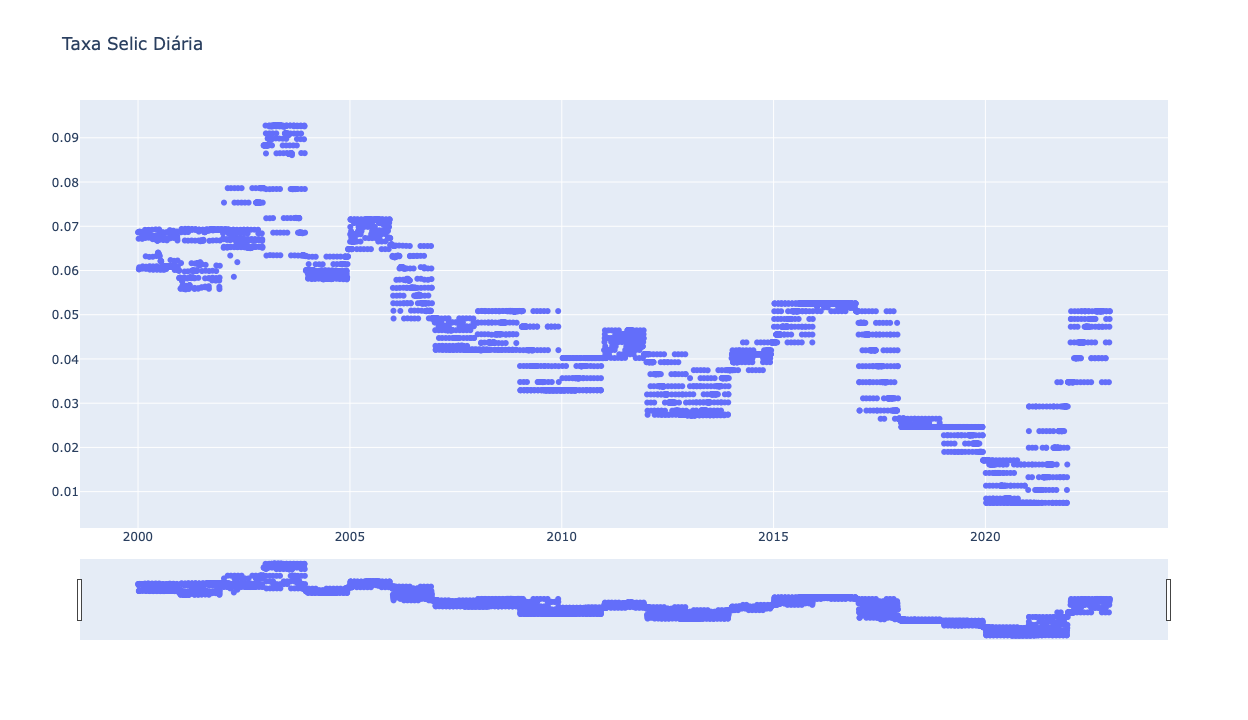

In [69]:
fig = go.Figure(data=[go.Scatter(x=bcdata['data'], y=bcdata['taxa Selic diária'], mode='markers')],
               layout=go.Layout(
                   title=go.layout.Title(text='taxa Selic diária'.title())
               ))
fig.update_layout(xaxis_rangeslider_visible=True)
fig.update_layout(autosize=False, width=1080, height=720)
fig.show()

In [61]:
selic_diaria = bcdata['taxa Selic diária'].to_numpy()

In [62]:
selic_anual = ((1 + selic_diaria/100)**252 - 1)*100

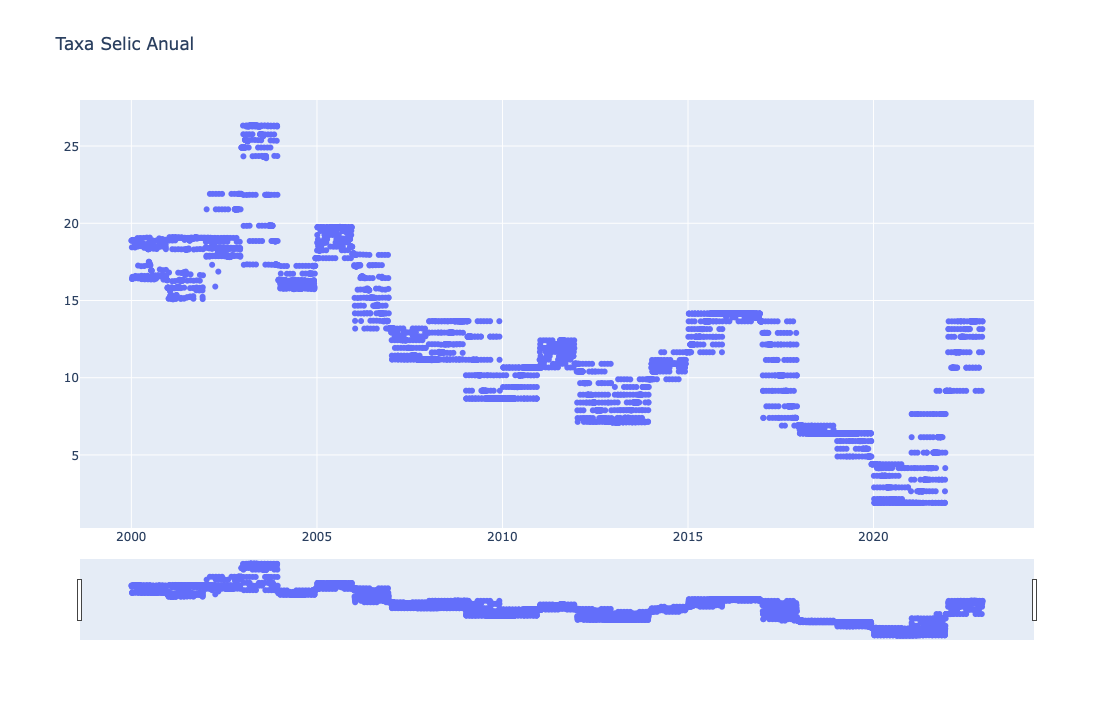

In [70]:
fig = go.Figure(data=[go.Scatter(x=bcdata['data'], y=selic_anual, mode='markers')],
               layout=go.Layout(
                   title=go.layout.Title(text='taxa Selic anual'.title())
               ))
fig.update_layout(xaxis_rangeslider_visible=True)
fig.update_layout(autosize=False, width=1080, height=720)
fig.show()